# Jores et al 2021 Intepretation
**Authorship:**
Adam Klie, *08/12/2022*
***
**Description:**
Notebook to interpret the best trained models on the Jores et al (2021) dataset.
***

In [185]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import os
import glob
import logging
import torch
import numpy as np
import pandas as pd
import eugene as eu
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# For illustrator purposes
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [186]:
eu.settings.dataset_dir = "/cellar/users/aklie/data/eugene/jores21"
eu.settings.output_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/jores21"
eu.settings.logging_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/logs/jores21"
eu.settings.config_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/configs/jores21"
eu.settings.figure_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/figures/jores21"

# Load in the `leaf`, `proto` and `combined` test `SeqData`s 

In [187]:
# Load in the preprocessed training data
sdata_leaf = eu.dl.read(os.path.join(eu.settings.output_dir, "leaf_test_predictions.h5sd"))
sdata_proto = eu.dl.read(os.path.join(eu.settings.output_dir, "proto_test_predictions.h5sd"))
sdata_combined = eu.dl.read(os.path.join(eu.settings.output_dir, "combined_test_predictions.h5sd"))
sdata_leaf, sdata_proto, sdata_combined

(SeqData object with = 7154 seqs
 seqs = (7154,)
 names = (7154,)
 rev_seqs = None
 ohe_seqs = (7154, 4, 170)
 ohe_rev_seqs = (7154, 4, 170)
 seqs_annot: 'GC', 'Jores21CNN_trial_1_enrichment_predictions', 'Jores21CNN_trial_2_enrichment_predictions', 'Jores21CNN_trial_3_enrichment_predictions', 'Jores21CNN_trial_4_enrichment_predictions', 'Jores21CNN_trial_5_enrichment_predictions', 'barcodes', 'batch', 'chromosome', 'end', 'enrichment', 'gene', 'mutations', 'set', 'sp', 'ssCNN_trial_1_enrichment_predictions', 'ssCNN_trial_2_enrichment_predictions', 'ssCNN_trial_3_enrichment_predictions', 'ssCNN_trial_4_enrichment_predictions', 'ssCNN_trial_5_enrichment_predictions', 'ssHybrid_trial_1_enrichment_predictions', 'ssHybrid_trial_2_enrichment_predictions', 'ssHybrid_trial_3_enrichment_predictions', 'ssHybrid_trial_4_enrichment_predictions', 'ssHybrid_trial_5_enrichment_predictions', 'start', 'strand', 'type'
 pos_annot: None
 seqsm: None
 uns: None,
 SeqData object with = 7595 seqs
 seqs = (

# Load the best model

In [188]:
leaf_model_file = glob.glob(os.path.join(eu.settings.logging_dir, "ssHybrid", f"leaf_trial_5", "checkpoints", "*"))[0]
leaf_model = eu.models.Hybrid.load_from_checkpoint(leaf_model_file)
proto_model_file = glob.glob(os.path.join(eu.settings.logging_dir, "Jores21CNN", f"proto_trial_2", "checkpoints", "*"))[0]
proto_model = eu.models.Jores21CNN.load_from_checkpoint(proto_model_file)
combined_model_file = glob.glob(os.path.join(eu.settings.logging_dir, "Jores21CNN", f"combined_trial_3", "checkpoints", "*"))[0]
combined_model = eu.models.Jores21CNN.load_from_checkpoint(combined_model_file)

In [190]:
# Choose which model you want to intepret
name = "leaf"
model = leaf_model
sdata = sdata_leaf
model, sdata

(Hybrid(
   (hp_metric): R2Score()
   (convnet): BasicConv1D(
     (module): Sequential(
       (0): Conv1d(4, 256, kernel_size=(13,), stride=(1,))
       (1): ReLU()
       (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
       (3): Dropout(p=0.3, inplace=False)
       (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (5): Conv1d(256, 256, kernel_size=(13,), stride=(1,))
       (6): ReLU()
       (7): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
       (8): Dropout(p=0.3, inplace=False)
       (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (10): Conv1d(256, 256, kernel_size=(13,), stride=(1,))
       (11): ReLU()
       (12): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
       (13): Dropout(p=0.3, inplace=False)
       (14): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

# Feature attribution

In [191]:
# Run three saliency feature attribution methods across all sequences
saliency_methods = ["InputXGradient", "DeepLift", "GradientSHAP"]
for method in saliency_methods:
    eu.interpret.feature_attribution_sdata(
        model=model,
        sdata=sdata,
        method=method
    )

False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/55 [00:00<?, ?it/s]

False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/55 [00:00<?, ?it/s]

/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/captum/attr/_core/deep_lift.py:339: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  after the attribution is finished"""
/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/captum/attr/_core/deep_lift.py:471: UserWarning: An invalid module MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) is detected. Saved gradients will
                be used as the gradients of the module's input tensor.
                See MaxPool1d as an example.
  module
/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/torch/nn/functional.py:651: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool1d in a future release.
  warnings.warn("Note t

False
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/55 [00:00<?, ?it/s]

Importance values: 0it [00:00, ?it/s]

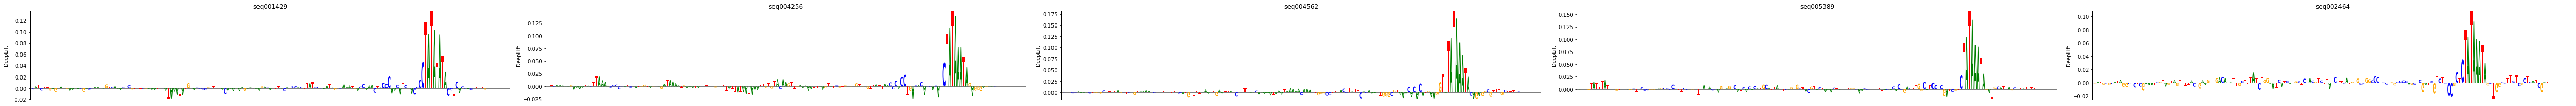

In [192]:
# Grab the top10 in terms of predictions to plot tracks for
top5 = sdata["ssHybrid_trial_5_enrichment_predictions"].sort_values(ascending=False).iloc[:5].index

eu.pl.lm_multiseq_track(
    sdata,
    seq_ids=top5,
    uns_keys = "DeepLift_imps",
    ylabels="DeepLift",
    height=3,
    width=70,
    save=os.path.join(eu.settings.figure_dir, f"{name}_best_model_feature_attr.pdf")
)

# Filter viz

In [193]:
# Generate pfms from filters using method described in Minnoye et al. 2020
eu.interpret.generate_pfms_sdata(
    model=model, 
    sdata=sdata,
    method="Minnoye20"
)

No transforms given, assuming just need to tensorize.


Getting maximial activating seqlets:   0%|          | 0/55 [00:00<?, ?it/s]

Getting filter activators for 256 filters:   0%|          | 0/256 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/256 [00:00<?, ?it/s]

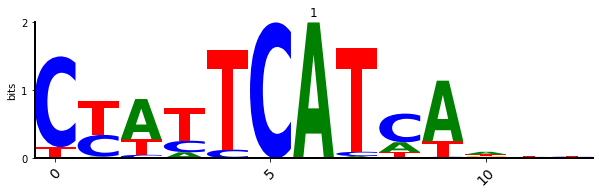

In [194]:
# Visualize a filter of choice
eu.pl.lm_filter_viz(
    sdata,
    filter_id=1
)

Plotting and saving filters 1-32
Plotting and saving filters 33-64
Plotting and saving filters 65-96
Plotting and saving filters 97-128
Plotting and saving filters 129-160
Plotting and saving filters 161-192
Plotting and saving filters 193-224
Plotting and saving filters 225-256


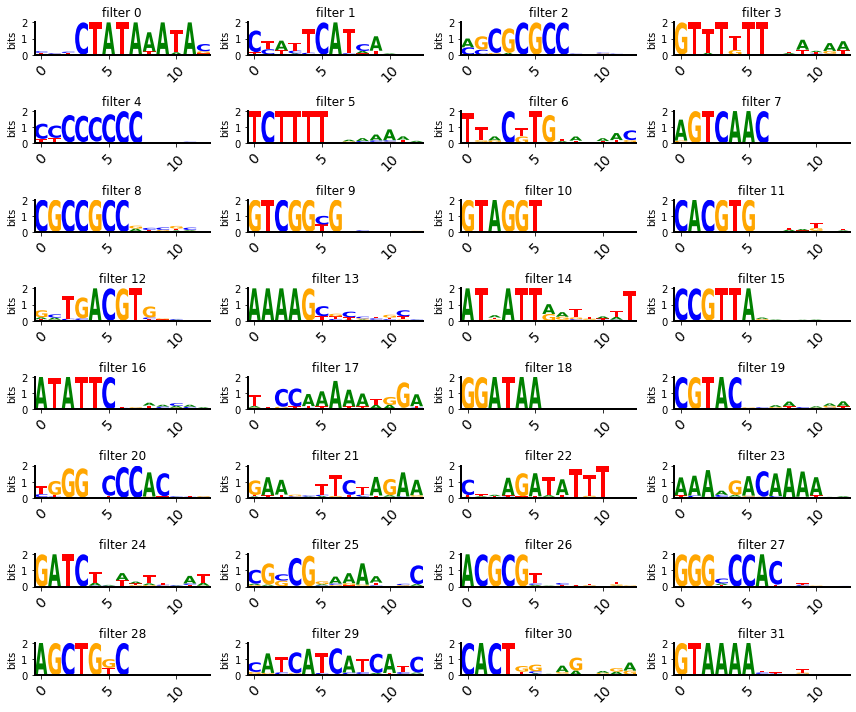

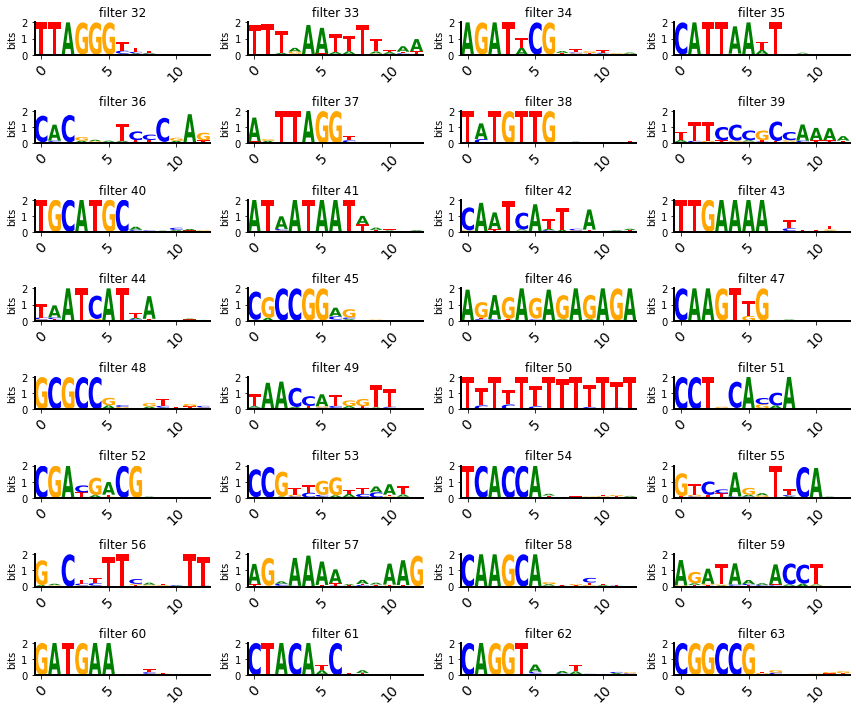

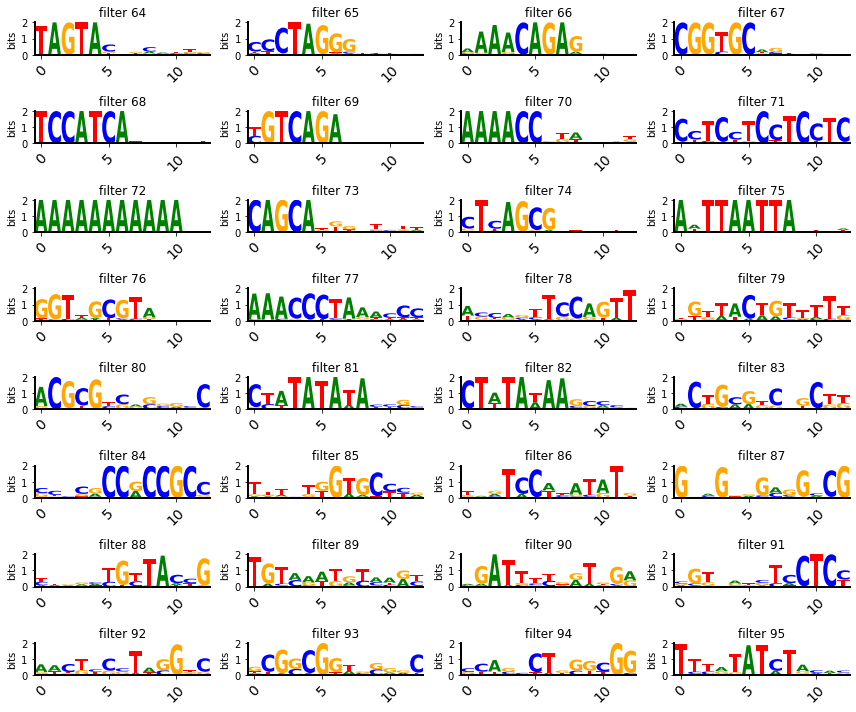

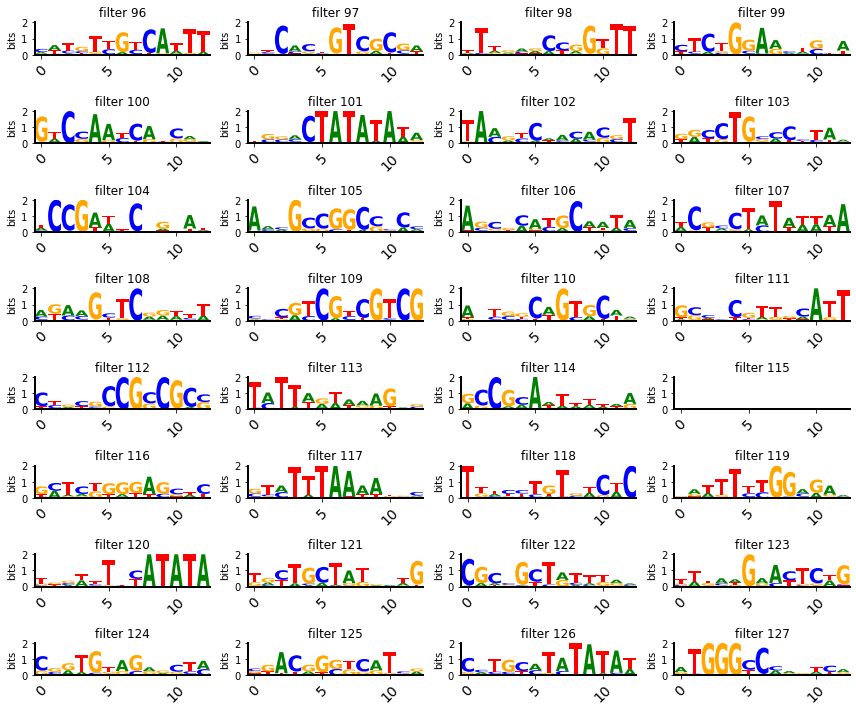

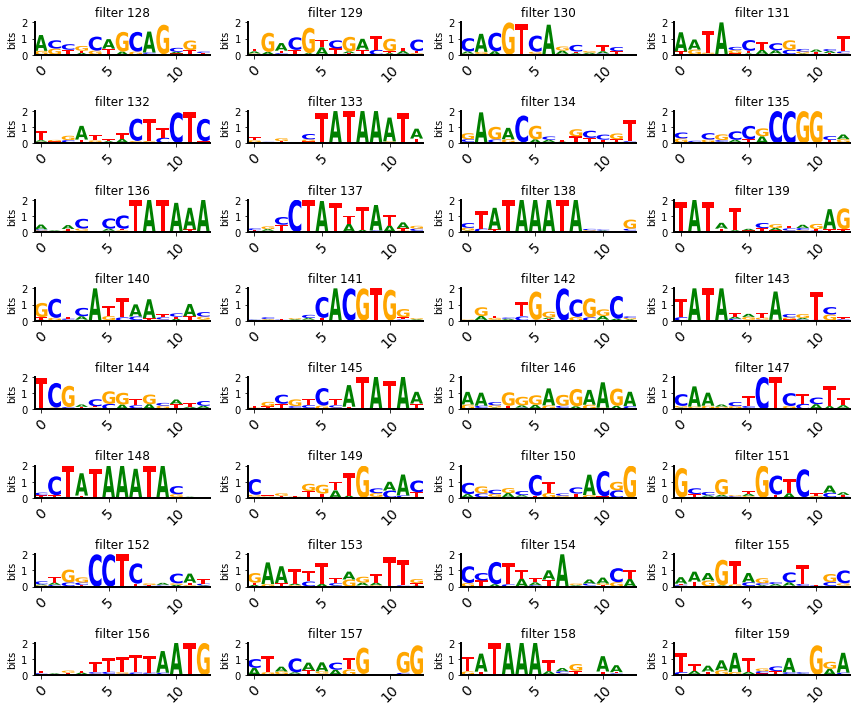

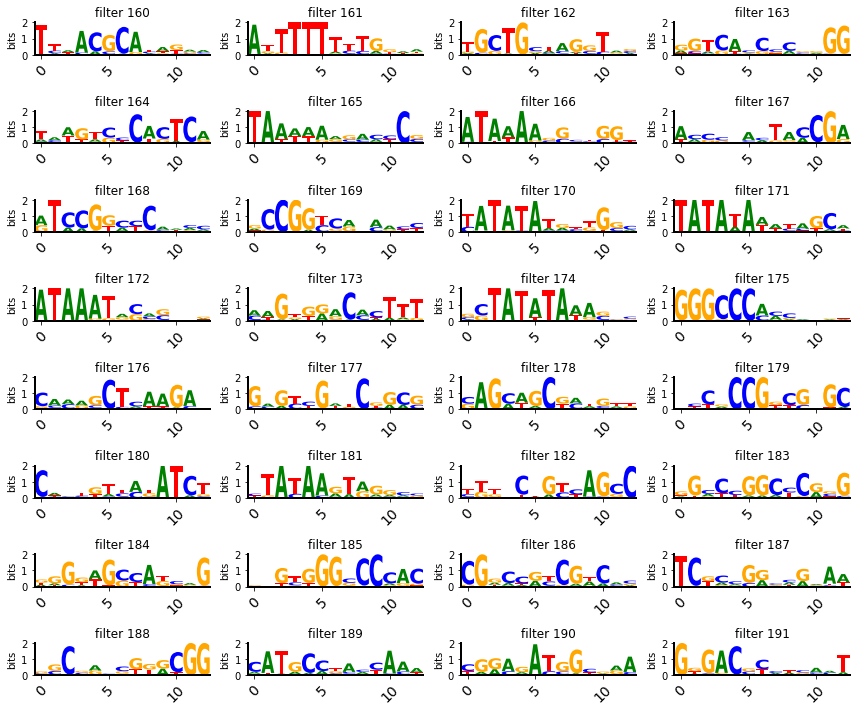

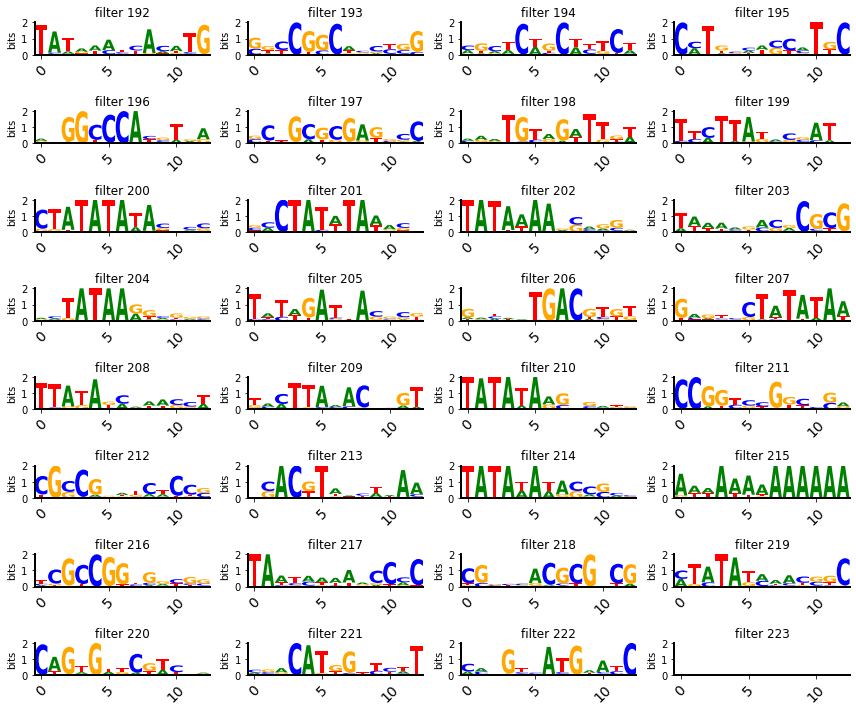

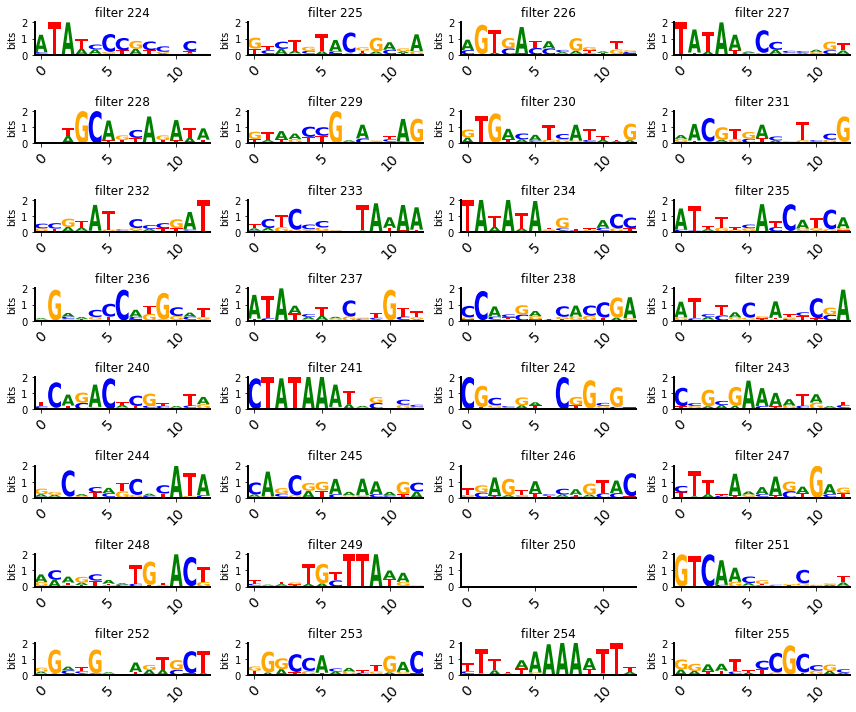

In [195]:
# Visualize multiple filters at once and save
for i in range(8):
    start_filter = i*32
    end_filter = (i*32) + 32
    print(f"Plotting and saving filters {start_filter+1}-{end_filter}")
    eu.pl.lm_multifilter_viz(
        sdata,
        filter_ids=list(sdata.uns["pfms"].keys())[start_filter:end_filter],
        num_rows=8,
        num_cols=4,
        titles=[f"filter {i}" for i in range(start_filter, end_filter)],
        save=os.path.join(eu.settings.figure_dir, f"{name}_best_model_filters{start_filter+1}-{end_filter}_viz.pdf")
    )

In [196]:
# Save all the filter pfms from above as meme format for submission to TomTom
eu.dl.motif.filters_to_meme_sdata(
    sdata,
    filter_ids=list(sdata.uns["pfms"].keys()),
    output_dir=os.path.join(eu.settings.output_dir),
    file_name=f"{name}_best_model_filters.meme"
)

Saved PWM File as : /cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/jores21/leaf_best_model_filters.meme


In [197]:
sdata.write_h5sd(os.path.join(eu.settings.output_dir, f"{name}_test_predictions_and_interpretations.h5sd"))

## In silico evolution 

In [177]:
# Load in sequences that were evolved in the published paper
sdata_evolve = eu.dl.read_csv(os.path.join(eu.settings.dataset_dir, "promoters_for_evolution.tsv"), seq_col="sequence", name_col="name")
eu.pp.ohe_seqs_sdata(sdata_evolve)
sdata_evolve

One-hot encoding sequences:   0%|          | 0/310 [00:00<?, ?it/s]

SeqData object modified:
	ohe_seqs: None -> 310 ohe_seqs added


SeqData object with = 310 seqs
seqs = (310,)
names = (310,)
rev_seqs = None
ohe_seqs = (310, 4, 170)
ohe_rev_seqs = None
seqs_annot: 'target'
pos_annot: None
seqsm: None
uns: None

In [178]:
# Evolve them using the best model across 10 rounds
eu.interpret.evolve_seqs_sdata(
    model,
    sdata_evolve,
    rounds=10
)

Evolving seqs:   0%|          | 0/310 [00:00<?, ?it/s]

SeqData object modified:
    seqs_annot:
        + evolved_8_score, evolved_7_score, evolved_1_score, evolved_10_score, evolved_4_score, evolved_5_score, evolved_9_score, original_score, evolved_3_score, evolved_2_score, evolved_6_score


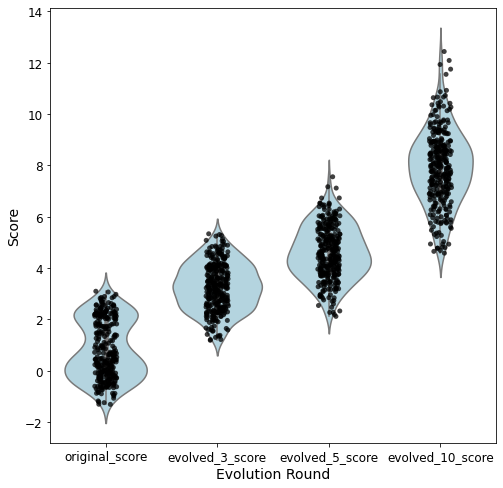

In [179]:
eu.pl.violinplot(
    sdata_evolve,
    groupby=["original_score", "evolved_3_score", "evolved_5_score", "evolved_10_score"],
    xlabel="Evolution Round",
    ylabel="Score",
    color = "lightblue",
    save=os.path.join(eu.settings.figure_dir, f"{name}_best_model_evolution_summary.pdf")
)

In [180]:
sdata_evolve.write_h5sd(os.path.join(eu.settings.output_dir, f"{name}_evolved_sequences.h5sd")) 

# In silico feature implant

In [138]:
#sdata_evolve = eu.dl.read_h5sd(os.path.join(eu.settings.output_dir, f"{name}_evolved_sequences.h5sd"))

In [181]:
# Prep feature from meme file
meme = eu.dl.motif.MinimalMEME(path=os.path.join(eu.settings.dataset_dir, "CPEs.meme"))
motif = meme.motifs["TATA"]
feat_name = motif.name
pfm = motif.pfm
zero_pfm = np.zeros(pfm.shape)
rand_pfm = eu.pp.ohe_seq(eu.utils.random_seq(pfm.shape[0])).transpose()
consensus = motif.consensus
shuffled_pfm = eu.pp.ohe_seq(eu.pp.dinuc_shuffle_seq(consensus)).transpose()
feat_name, pfm, consensus

('TATA',
 array([[0.1275, 0.3765, 0.1195, 0.3765],
        [0.1575, 0.3985, 0.199 , 0.2455],
        [0.249 , 0.303 , 0.197 , 0.251 ],
        [0.1235, 0.655 , 0.0755, 0.1455],
        [0.01  , 0.002 , 0.002 , 0.986 ],
        [0.968 , 0.    , 0.    , 0.032 ],
        [0.002 , 0.014 , 0.006 , 0.978 ],
        [0.992 , 0.    , 0.002 , 0.006 ],
        [0.653 , 0.012 , 0.002 , 0.333 ],
        [0.974 , 0.    , 0.008 , 0.018 ],
        [0.341 , 0.028 , 0.036 , 0.5955],
        [0.6955, 0.0815, 0.1195, 0.1035],
        [0.1255, 0.432 , 0.3165, 0.1255],
        [0.291 , 0.418 , 0.175 , 0.1155],
        [0.263 , 0.3445, 0.1755, 0.2175],
        [0.307 , 0.3085, 0.2365, 0.1475]]),
 'CCCCTATAAATACCCC')

In [182]:
# Slide the TATA motif across the sequences
eu.interpret.feature_implant_seqs_sdata(
    model=model, 
    sdata=sdata_evolve, 
    feature=pfm, 
    seqsm_key=f"slide_{feat_name}",
    encoding="onehot", 
    onehot=True
)

# Slide a random seq across the sequences
eu.interpret.feature_implant_seqs_sdata(
    model=model, 
    sdata=sdata_evolve, 
    feature=rand_pfm,
    seqsm_key=f"slide_random",
    encoding="onehot", 
    onehot=True
)
sdata_evolve.seqsm[f"slide_random"].shape

# Slide a zero ohe seq across the sequences 
eu.interpret.feature_implant_seqs_sdata(
    model=model, 
    sdata=sdata_evolve, 
    feature=zero_pfm,
    seqsm_key=f"slide_zero",
    encoding="onehot", 
    onehot=True
)

# Slide a TATA shuffled ohe seq across the sequences 
eu.interpret.feature_implant_seqs_sdata(
    model=model, 
    sdata=sdata_evolve, 
    feature=shuffled_pfm,
    seqsm_key=f"slide_shuffled",
    encoding="onehot", 
    onehot=True
)

Implanting feature in all seqs of sdata:   0%|          | 0/310 [00:00<?, ?it/s]

Implanting feature in all seqs of sdata:   0%|          | 0/310 [00:00<?, ?it/s]

Implanting feature in all seqs of sdata:   0%|          | 0/310 [00:00<?, ?it/s]

Implanting feature in all seqs of sdata:   0%|          | 0/310 [00:00<?, ?it/s]

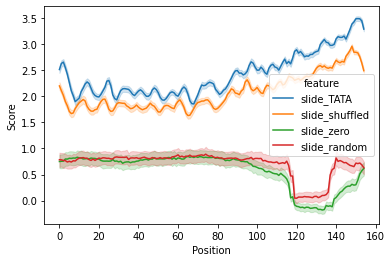

In [183]:
eu.pl.feature_implant_plot(
    sdata_evolve,
    seqsm_keys=[f"slide_{feat_name}", "slide_shuffled", "slide_zero", "slide_random"],
    save=os.path.join(eu.settings.figure_dir, f"{name}_best_model_feature_implant_TATA.pdf")
)

In [184]:
sdata_evolve.write_h5sd(os.path.join(eu.settings.output_dir, f"{name}_evolved_sequences_with_TATA_implant.h5sd")) 

---

# Scratch